# Fire/Smoke Detection Model Draft
Emily Donofrio

### Set up

In [35]:
import keras
import pandas as pd
import numpy

In [7]:
image_folder = 'images/'
full_data_path = 'image_data_full.csv'

In [3]:
sample_data = pd.read_csv('image_data_sample.csv')

In [4]:
sample_data.shape

(9531, 6)

In [5]:
sample_data.head()

,image_path,width,height,class,aspect_ratio,pixel_count
0,images/neitherFireNorSmoke_CV022026.jpg,690,714,neither,0.966387,492660
1,images/neitherFireNorSmoke_CV004700.jpg,325,450,neither,0.722222,146250
2,images/bothFireAndSmoke_CV014234.jpg,512,384,both,1.333333,196608
3,images/neitherFireNorSmoke_CV028776.jpg,524,650,neither,0.806154,340600
4,images/neitherFireNorSmoke_CV007468.jpg,800,533,neither,1.500938,426400


In [8]:
df = pd.read_csv(full_data_path)
df.shape

(95314, 6)

### Preprocessing

In [9]:
df = df.sort_values(by='image_path').reset_index(drop=True)

In [12]:
# map class labels to integers
class_mapping = {label: idx for idx, label in enumerate(df['class'].unique())}
df['class'] = df['class'].map(class_mapping)

In [46]:
class_mapping

{'both': 0, 'fire': 1, 'neither': 2, 'smoke': 3}

In [14]:
image_size = (180, 180)

dsTrain, dsTest = keras.utils.image_dataset_from_directory(
    image_folder,
    validation_split=0.2,
    subset="both",
    seed=28,
    labels=df['class'].tolist(), # Pass the sorted list of labels
    label_mode='categorical', # or 'binary', 'sparse', etc.
    image_size=image_size,
    batch_size=128
)

Found 95314 files belonging to 4 classes.
Using 76252 files for training.
Using 76252 files for training.
Using 19062 files for validation.
Using 19062 files for validation.


### Model 1: Predicting the 4 classes - dense sequential

In [15]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop after 5 epochs with no improvement
    min_delta=0.001,     # Minimum change to qualify as improvement
    verbose=2,           # Display messages when callback takes action
    restore_best_weights=True # Restore weights from the best epoch
)

In [28]:
# build a simple model
model1 = keras.Sequential([
     keras.Input(shape=image_size + (3,) ), # each element of the image has a value for 3 colors
     keras.layers.Dense(20, activation="relu"),
     keras.layers.Flatten(),
     keras.layers.Dense(4, activation="sigmoid")
 ])

In [29]:
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 180, 180, 20)   │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 648000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │     2,592,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,592,084 (9.89 MB)

 Trainable params: 2,592,084 (9.89 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model1.compile( loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
model1.fit(dsTrain, epochs = 10, validation_data=dsTest, callbacks=[early_stopping])

Epoch 1/10
424/596 ━━━━━━━━━━━━━━━━━━━━ 23s 138ms/step - accuracy: 0.4369 - loss: 1738.1563

596/596 ━━━━━━━━━━━━━━━━━━━━ 98s 163ms/step - accuracy: 0.5187 - loss: 523.3415 - val_accuracy: 0.5758 - val_loss: 4.0953
Epoch 2/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 98s 163ms/step - accuracy: 0.5187 - loss: 523.3415 - val_accuracy: 0.5758 - val_loss: 4.0953
Epoch 2/10
439/596 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - accuracy: 0.5764 - loss: 2.0534

596/596 ━━━━━━━━━━━━━━━━━━━━ 94s 157ms/step - accuracy: 0.5917 - loss: 1.1702 - val_accuracy: 0.6282 - val_loss: 0.6026
Epoch 3/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 94s 157ms/step - accuracy: 0.5917 - loss: 1.1702 - val_accuracy: 0.6282 - val_loss: 0.6026
Epoch 3/10
436/596 ━━━━━━━━━━━━━━━━━━━━ 21s 132ms/step - accuracy: 0.6564 - loss: 0.4912

596/596 ━━━━━━━━━━━━━━━━━━━━ 96s 161ms/step - accuracy: 0.6635 - loss: 0.4551 - val_accuracy: 0.6433 - val_loss: 0.5227
Epoch 4/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 96s 161ms/step - accuracy: 0.6635 - loss: 0.4551 - val_accuracy: 0.6433 - val_loss: 0.5227
Epoch 4/10
428/596 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.6916 - loss: 0.3889

596/596 ━━━━━━━━━━━━━━━━━━━━ 91s 152ms/step - accuracy: 0.6965 - loss: 0.3712 - val_accuracy: 0.6530 - val_loss: 0.5260
Epoch 5/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 91s 152ms/step - accuracy: 0.6965 - loss: 0.3712 - val_accuracy: 0.6530 - val_loss: 0.5260
Epoch 5/10
428/596 ━━━━━━━━━━━━━━━━━━━━ 22s 132ms/step - accuracy: 0.7207 - loss: 0.3361

596/596 ━━━━━━━━━━━━━━━━━━━━ 92s 154ms/step - accuracy: 0.7234 - loss: 0.3320 - val_accuracy: 0.6524 - val_loss: 0.5857
Epoch 6/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 92s 154ms/step - accuracy: 0.7234 - loss: 0.3320 - val_accuracy: 0.6524 - val_loss: 0.5857
Epoch 6/10
435/596 ━━━━━━━━━━━━━━━━━━━━ 21s 132ms/step - accuracy: 0.7445 - loss: 0.3170

596/596 ━━━━━━━━━━━━━━━━━━━━ 100s 167ms/step - accuracy: 0.7468 - loss: 0.3105 - val_accuracy: 0.6662 - val_loss: 0.5844
Epoch 7/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 100s 167ms/step - accuracy: 0.7468 - loss: 0.3105 - val_accuracy: 0.6662 - val_loss: 0.5844
Epoch 7/10
436/596 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - accuracy: 0.7663 - loss: 0.2801

596/596 ━━━━━━━━━━━━━━━━━━━━ 93s 155ms/step - accuracy: 0.7679 - loss: 0.2842 - val_accuracy: 0.6661 - val_loss: 0.6299
Epoch 8/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 93s 155ms/step - accuracy: 0.7679 - loss: 0.2842 - val_accuracy: 0.6661 - val_loss: 0.6299
Epoch 8/10
432/596 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.7850 - loss: 0.2717

596/596 ━━━━━━━━━━━━━━━━━━━━ 91s 152ms/step - accuracy: 0.7842 - loss: 0.2676 - val_accuracy: 0.6732 - val_loss: 0.6724
Epoch 8: early stopping
Restoring model weights from the end of the best epoch: 3.
596/596 ━━━━━━━━━━━━━━━━━━━━ 91s 152ms/step - accuracy: 0.7842 - loss: 0.2676 - val_accuracy: 0.6732 - val_loss: 0.6724
Epoch 8: early stopping
Restoring model weights from the end of the best epoch: 3.


In [33]:
import sklearn.metrics

In [34]:
predTrainN1 = model1.predict( dsTrain )
predTestN1 = model1.predict( dsTest )

447/596 ━━━━━━━━━━━━━━━━━━━━ 15s 106ms/step

596/596 ━━━━━━━━━━━━━━━━━━━━ 62s 104ms/step
596/596 ━━━━━━━━━━━━━━━━━━━━ 62s 104ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step


In [39]:
y_pred_train = numpy.argmax(predTrainN1, axis=1)
y_pred_test  = numpy.argmax(predTestN1, axis=1)

In [41]:
# Extract labels from dsTrain for use in metrics
y_train = []
for images, labels in dsTrain:
    y_train.extend(labels.numpy())

# Extract labels from dsTest
y_test = []
for images, labels in dsTest:
    y_test.extend(labels.numpy())

# Convert the lists to numpy arrays and get class indices
y_train = numpy.array(y_train)
y_test = numpy.array(y_test)

# Convert one-hot encoded labels to class indices
y_train = numpy.argmax(y_train, axis=1)
y_test = numpy.argmax(y_test, axis=1)

print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Unique values in y_train:", numpy.unique(y_train))
print("Unique values in y_test:", numpy.unique(y_test))

Shape of y_train: (76252,)
Shape of y_test: (19062,)
Unique values in y_train: [0 1 2 3]
Unique values in y_test: [0 1 2 3]


2026-02-09 01:45:32.686974: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [42]:
print( sklearn.metrics.balanced_accuracy_score( y_train, y_pred_train) )
print( sklearn.metrics.balanced_accuracy_score( y_test, y_pred_test) )

0.2500184363852962
0.5562590555883185


In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt



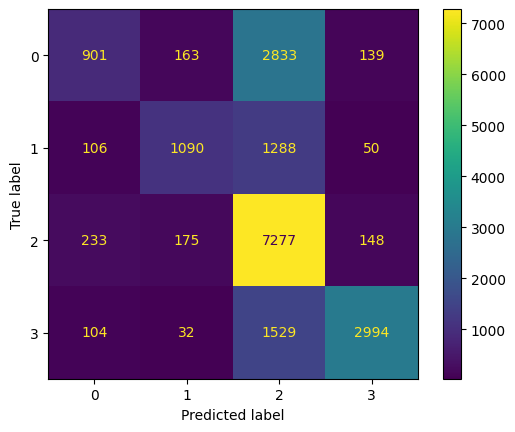

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
sklearn.metrics.ConfusionMatrixDisplay(cm).plot()

Reminder of labels: {'both': 0, 'fire': 1, 'neither': 2, 'smoke': 3}
<br> <br>
Notes: <br>
- most correct are correctly predicting neither
- odd that training accuracy is much lower than test accuracy, may indicate volatility and not true model performance

### Model 2: Predicting the 4 classes - convolutional layers

In [47]:
model2 = keras.Sequential(
    [
        keras.Input(shape=image_size + (3,) ),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense( 4, activation="sigmoid"),
    ]
)

In [48]:
model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 118336)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 118336)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │       473,348 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 492,740 (1.88 MB)

 Trainable params: 492,740 (1.88 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model2.compile( loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
model2.fit(dsTrain, epochs = 10, validation_data=dsTest, callbacks=[early_stopping])

Epoch 1/10
450/596 ━━━━━━━━━━━━━━━━━━━━ 1:35 651ms/step - accuracy: 0.5579 - loss: 27.6124

596/596 ━━━━━━━━━━━━━━━━━━━━ 424s 710ms/step - accuracy: 0.5735 - loss: 4.3908 - val_accuracy: 0.5996 - val_loss: 0.4736
Epoch 2/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 424s 710ms/step - accuracy: 0.5735 - loss: 4.3908 - val_accuracy: 0.5996 - val_loss: 0.4736
Epoch 2/10
446/596 ━━━━━━━━━━━━━━━━━━━━ 7:19 3s/step - accuracy: 0.5908 - loss: 1.0342

596/596 ━━━━━━━━━━━━━━━━━━━━ 1435s 2s/step - accuracy: 0.5942 - loss: 1.0206 - val_accuracy: 0.6220 - val_loss: 0.4230
Epoch 3/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 1435s 2s/step - accuracy: 0.5942 - loss: 1.0206 - val_accuracy: 0.6220 - val_loss: 0.4230
Epoch 3/10
439/596 ━━━━━━━━━━━━━━━━━━━━ 1:39 637ms/step - accuracy: 0.6074 - loss: 0.9334

596/596 ━━━━━━━━━━━━━━━━━━━━ 417s 699ms/step - accuracy: 0.6050 - loss: 1.0754 - val_accuracy: 0.5863 - val_loss: 0.4343
Epoch 4/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 417s 699ms/step - accuracy: 0.6050 - loss: 1.0754 - val_accuracy: 0.5863 - val_loss: 0.4343
Epoch 4/10
443/596 ━━━━━━━━━━━━━━━━━━━━ 7:17 3s/step - accuracy: 0.6106 - loss: 3.8799

596/596 ━━━━━━━━━━━━━━━━━━━━ 1396s 2s/step - accuracy: 0.6079 - loss: 3.7239 - val_accuracy: 0.6083 - val_loss: 0.4139
Epoch 5/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 1396s 2s/step - accuracy: 0.6079 - loss: 3.7239 - val_accuracy: 0.6083 - val_loss: 0.4139
Epoch 5/10
444/596 ━━━━━━━━━━━━━━━━━━━━ 6:58 3s/step - accuracy: 0.6024 - loss: 6.7211

596/596 ━━━━━━━━━━━━━━━━━━━━ 1361s 2s/step - accuracy: 0.6083 - loss: 4.3448 - val_accuracy: 0.6022 - val_loss: 0.4173
Epoch 6/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 1361s 2s/step - accuracy: 0.6083 - loss: 4.3448 - val_accuracy: 0.6022 - val_loss: 0.4173
Epoch 6/10
462/596 ━━━━━━━━━━━━━━━━━━━━ 6:36 3s/step - accuracy: 0.6154 - loss: 1.6460

596/596 ━━━━━━━━━━━━━━━━━━━━ 1502s 3s/step - accuracy: 0.6176 - loss: 1.8564 - val_accuracy: 0.6207 - val_loss: 0.4146
Epoch 7/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 1502s 3s/step - accuracy: 0.6176 - loss: 1.8564 - val_accuracy: 0.6207 - val_loss: 0.4146
Epoch 7/10
441/596 ━━━━━━━━━━━━━━━━━━━━ 7:57 3s/step - accuracy: 0.6186 - loss: 3.2027

596/596 ━━━━━━━━━━━━━━━━━━━━ 1496s 3s/step - accuracy: 0.6162 - loss: 2.3132 - val_accuracy: 0.6127 - val_loss: 0.4242
Epoch 8/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 1496s 3s/step - accuracy: 0.6162 - loss: 2.3132 - val_accuracy: 0.6127 - val_loss: 0.4242
Epoch 8/10
439/596 ━━━━━━━━━━━━━━━━━━━━ 1:56 740ms/step - accuracy: 0.6255 - loss: 1.3554

596/596 ━━━━━━━━━━━━━━━━━━━━ 542s 910ms/step - accuracy: 0.6224 - loss: 4.4119 - val_accuracy: 0.6226 - val_loss: 0.4281
Epoch 9/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 542s 910ms/step - accuracy: 0.6224 - loss: 4.4119 - val_accuracy: 0.6226 - val_loss: 0.4281
Epoch 9/10
454/596 ━━━━━━━━━━━━━━━━━━━━ 2:25 1s/step - accuracy: 0.6266 - loss: 0.9614

596/596 ━━━━━━━━━━━━━━━━━━━━ 656s 1s/step - accuracy: 0.6256 - loss: 3.3587 - val_accuracy: 0.5995 - val_loss: 1.4217
Epoch 9: early stopping
Restoring model weights from the end of the best epoch: 4.
596/596 ━━━━━━━━━━━━━━━━━━━━ 656s 1s/step - accuracy: 0.6256 - loss: 3.3587 - val_accuracy: 0.5995 - val_loss: 1.4217
Epoch 9: early stopping
Restoring model weights from the end of the best epoch: 4.


In [ ]:
predTrainN2 = model2.predict( dsTrain )
predTestN2 = model2.predict( dsTest )